2018 Edition - Karam EL TANNIR, Mathieu MANSANAREZ, Gégé RASOLONDRAIBE

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# The dataset

## File descriptions

* train.csv - the training dataset
* test.csv - the test dataset
* data_description.txt - full description of each column

## Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value (in dollars) of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

# -------------------- NOTEBOOK --------------------

# 1. Descriptive statistics about the data

## 1.1. First dive into the dataset : Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
base = "challenge_data/"

In [3]:
train_data = pd.read_csv(base + "train.csv", index_col='Id')
test_data = pd.read_csv(base + "test.csv", index_col='Id')

In [4]:
train_test_dataset = pd.concat((train_data, test_data), axis=0)

In [5]:
train_test_dataset.shape

(1460, 80)

In [6]:
print('Shape of the train_data dataset: {}'.format(train_data.shape))
train_data.describe(include='all')

Shape of the train_data dataset: (1200, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1200.000000,1200,990.000000,1200.000000,1200,75,1200,1200,1200,1200,...,1200.000000,4,227,47,1200.000000,1200.000000,1200.000000,1200,1200,1200.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,3,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,946,NaN,NaN,1194,41,754,1079,1199,862,...,NaN,2,130,44,NaN,NaN,NaN,1036,979,NaN
mean,57.075000,NaN,70.086869,10559.411667,NaN,NaN,NaN,NaN,NaN,NaN,...,1.909167,NaN,NaN,NaN,40.453333,6.311667,2007.810833,NaN,NaN,181414.628333
std,42.682012,NaN,23.702029,10619.135549,NaN,NaN,NaN,NaN,NaN,NaN,...,33.148327,NaN,NaN,NaN,482.323444,2.673104,1.319027,NaN,NaN,81070.908544
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7560.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129900.000000
50%,50.000000,NaN,70.000000,9434.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163700.000000
75%,70.000000,NaN,80.000000,11616.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [7]:
print(test_data.shape)
train_data.head(5)

(260, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The **`train_data`** dataset is composed of 80 features (including the **`SalePrice`** feature), while the **`test_data`** dataset is composed of 79 features (without the **`SalePrice`** feature).  
As you can already infer from the data, the dataset is composed of numerical features and categorical features.  
There are also missing values that we will need to transform.  

We're going to tackle this 2 first observations with section 1.2 and ... 

## 1.2. Numerical features Vs Categorical features

From the observation of the **`train_data.describe()`**, we can infer that the **`train_data`** dataset contains different datatypes that we're going to examine deeper. 

In [8]:
train_data.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

A first glimpse into our data from the **`Data desctiption.rtf`** permits to understand the meaning and relevance to all features.  
Ceci nous permet déjà de changer le type de MSSubClass.  

????? MAIS DOIT-ON REELEMENT LE CHANGER ? ?????

In [9]:
train_data['MSSubClass'].dtype

dtype('int64')

In [10]:
train_data['MSSubClass'] = train_data['MSSubClass'].astype('object') # conversion as object type

In [11]:
train_data['MSSubClass'].dtype

dtype('O')

Creation of two pandas dataframes:
- **`numerical_train_data_df`** 
- **`categorical_train_data_df`**

In [12]:
numerical_train_data_df = train_data.select_dtypes(include=[np.number])
categorical_train_data_df = train_data.select_dtypes(exclude=[np.number])

In [13]:
print('Shape of numerical_train_data_df: {}'.format(numerical_train_data_df.shape))
print('Shape of categorical_train_data_df: {}'.format(categorical_train_data_df.shape))

Shape of numerical_train_data_df: (1200, 36)
Shape of categorical_train_data_df: (1200, 44)


We retrieve the 80 features from the original **`train_data`** dataset. 

In [14]:
numerical_train_data_df.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
2,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
3,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
4,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
5,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [15]:
categorical_train_data_df.head(5)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [16]:
numerical_train_data_df['BedroomAbvGr'].value_counts()

3    658
2    299
4    171
1     44
5     17
6      6
0      4
8      1
Name: BedroomAbvGr, dtype: int64

### 1.2.1. SalePrice insight

An unique section dedicated to the labels of our dataset to better understand its attributes and behavior. 

Text(0.5,1,'log(SalePrice) Distribution = Normalize OU STANDARNIZATION ?')

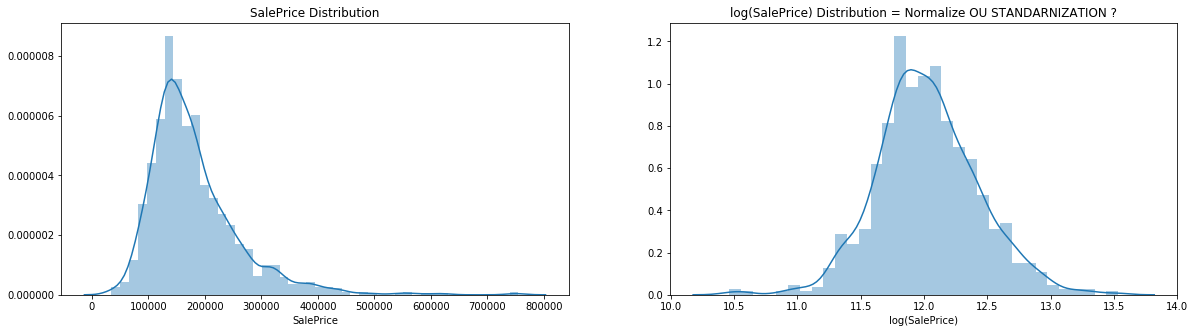

In [17]:
sale_price = numerical_train_data_df['SalePrice']
mu = sale_price.mean()
sigma = sale_price.std()
plt.figure(figsize=[20,5])
plt.subplot(121)
sns.distplot(sale_price, kde=True)
plt.xlabel('SalePrice')
plt.title('SalePrice Distribution')
plt.subplot(122)
sns.distplot(np.log(sale_price), kde=True)
plt.xlabel('log(SalePrice)')
plt.title('log(SalePrice) Distribution = Normalize OU STANDARNIZATION ?')

In [18]:
print('Skewness = {}'.format(sale_price.skew()))
print('Kurtosis = {}'.format(sale_price.kurt()))
print('log Skewness = {}'.format(np.log(sale_price).skew()))
print('log Kurtosis = {}'.format(np.log(sale_price).kurt()))

Skewness = 1.9672153474609588
Kurtosis = 7.033906965957225
log Skewness = 0.1327137746797166
log Kurtosis = 0.8888499967600696


### 1.2.2. Visualization of numerical features

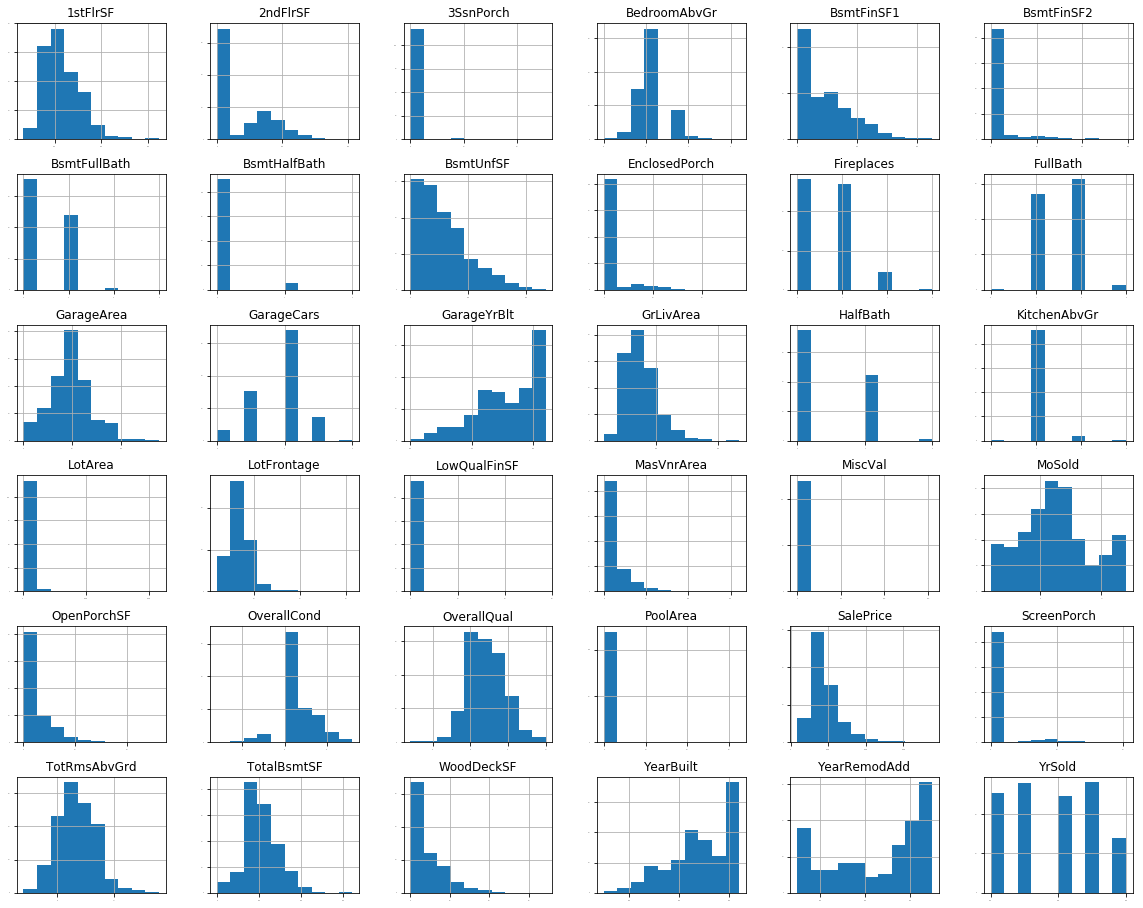

In [19]:
### PEUT ON METTRE DES VALEURS POUR LES AXES ?????

plt.subplots(figsize=(20,16))
ax=plt.subplot()
numerical_train_data_df.hist(xlabelsize=1, ylabelsize=1, ax=ax)
#numerical_train_data_df.hist(xlabelsize=1, ylabelsize=1, subplot=True)
plt.show()

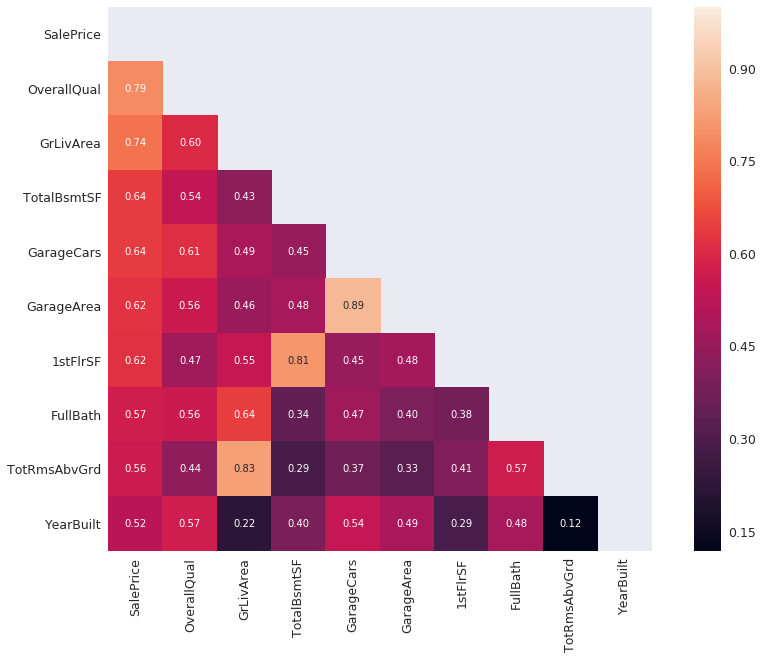

In [20]:
corr_matrix = numerical_train_data_df.corr()
plt.figure(figsize=(15,10))
k = 10
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(numerical_train_data_df[cols].values.T)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.set(font_scale=1.25)
sns.heatmap(cm, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, \
           yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [21]:
important_numerical_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars']

According to our heatmap above, these are the features most correlated between each other.  
Here are some oservations we can infer from the heatmap.
- **`OverallQual`**, **`GrLivArea`**, **`TotalBsmtSF`**, **`GarageCars`**, **`GarageArea`** are strongly correlated to the **`SalePrice`** feature. 
- **`GarageCars`** and **`GarageAreas`** are the most strongly correlated features. EN PRENANT LA DEFINITION PURE DU DOCUMENT RTF, LEUR DEFINITION EST FORTEMENT SEMBLABLE ET DONC FORTEMENT COLINEAIRE

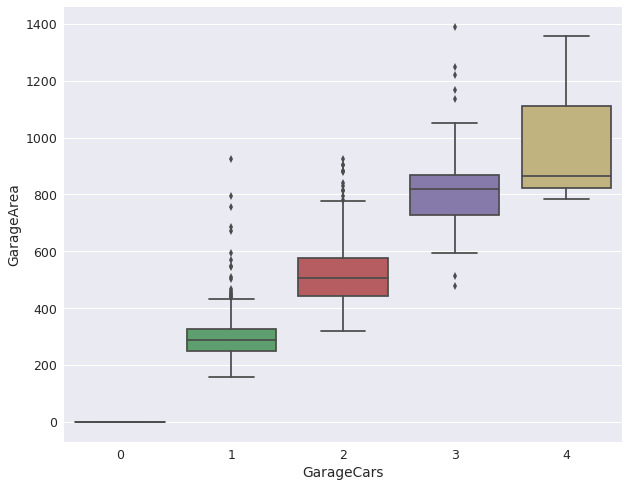

In [22]:
plt.subplots(figsize=(10, 8))
ax = plt.subplot()
sns.boxplot(x = 'GarageCars', y = 'GarageArea', data=numerical_train_data_df)

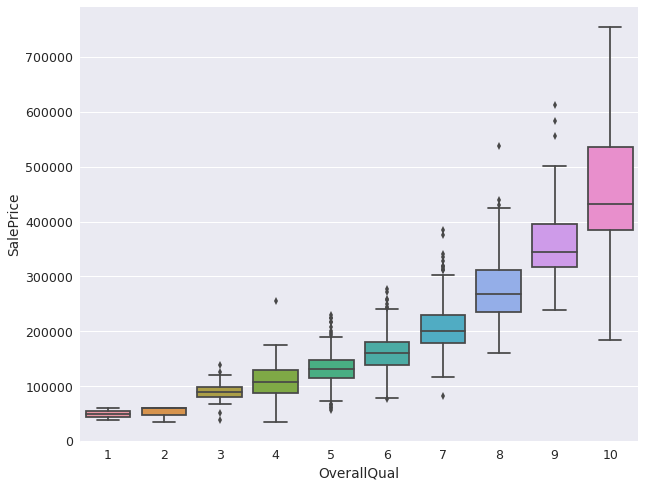

In [23]:
plt.subplots(figsize=(10,8))
ax = plt.subplot()
sns.boxplot(x = 'OverallQual', y='SalePrice', data=numerical_train_data_df)

#### 1.2.3. Correlation matrix : all numerical features

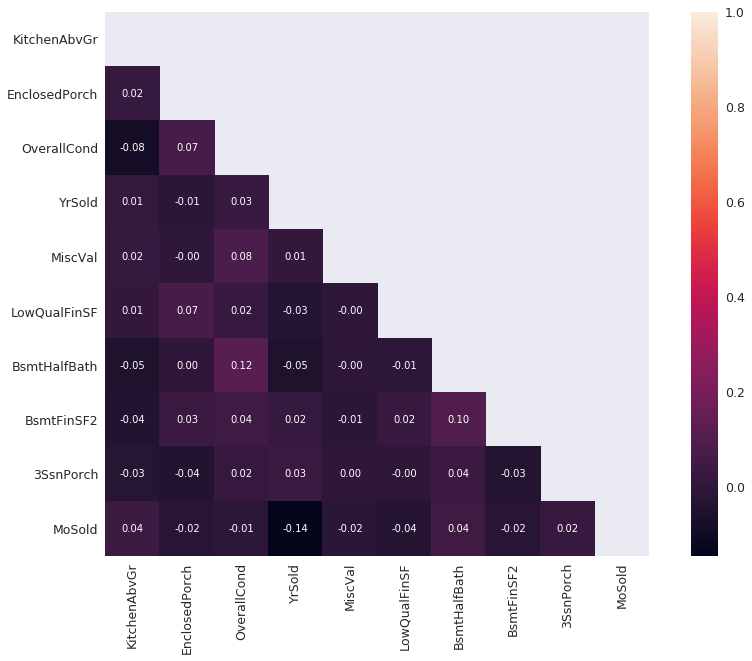

In [24]:
plt.figure(figsize=(15,10))
k = 10
cols = corr_matrix.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.set(font_scale=1.25)
sns.heatmap(cm, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, \
           yticklabels=cols.values, xticklabels=cols.values)
plt.show()

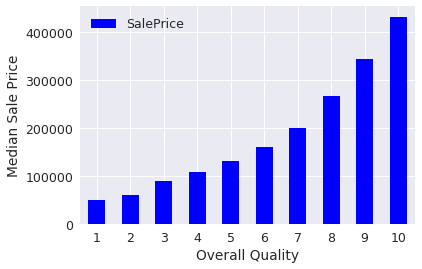

In [25]:
quality_pivot = numerical_train_data_df.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Important numerical features: ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars']


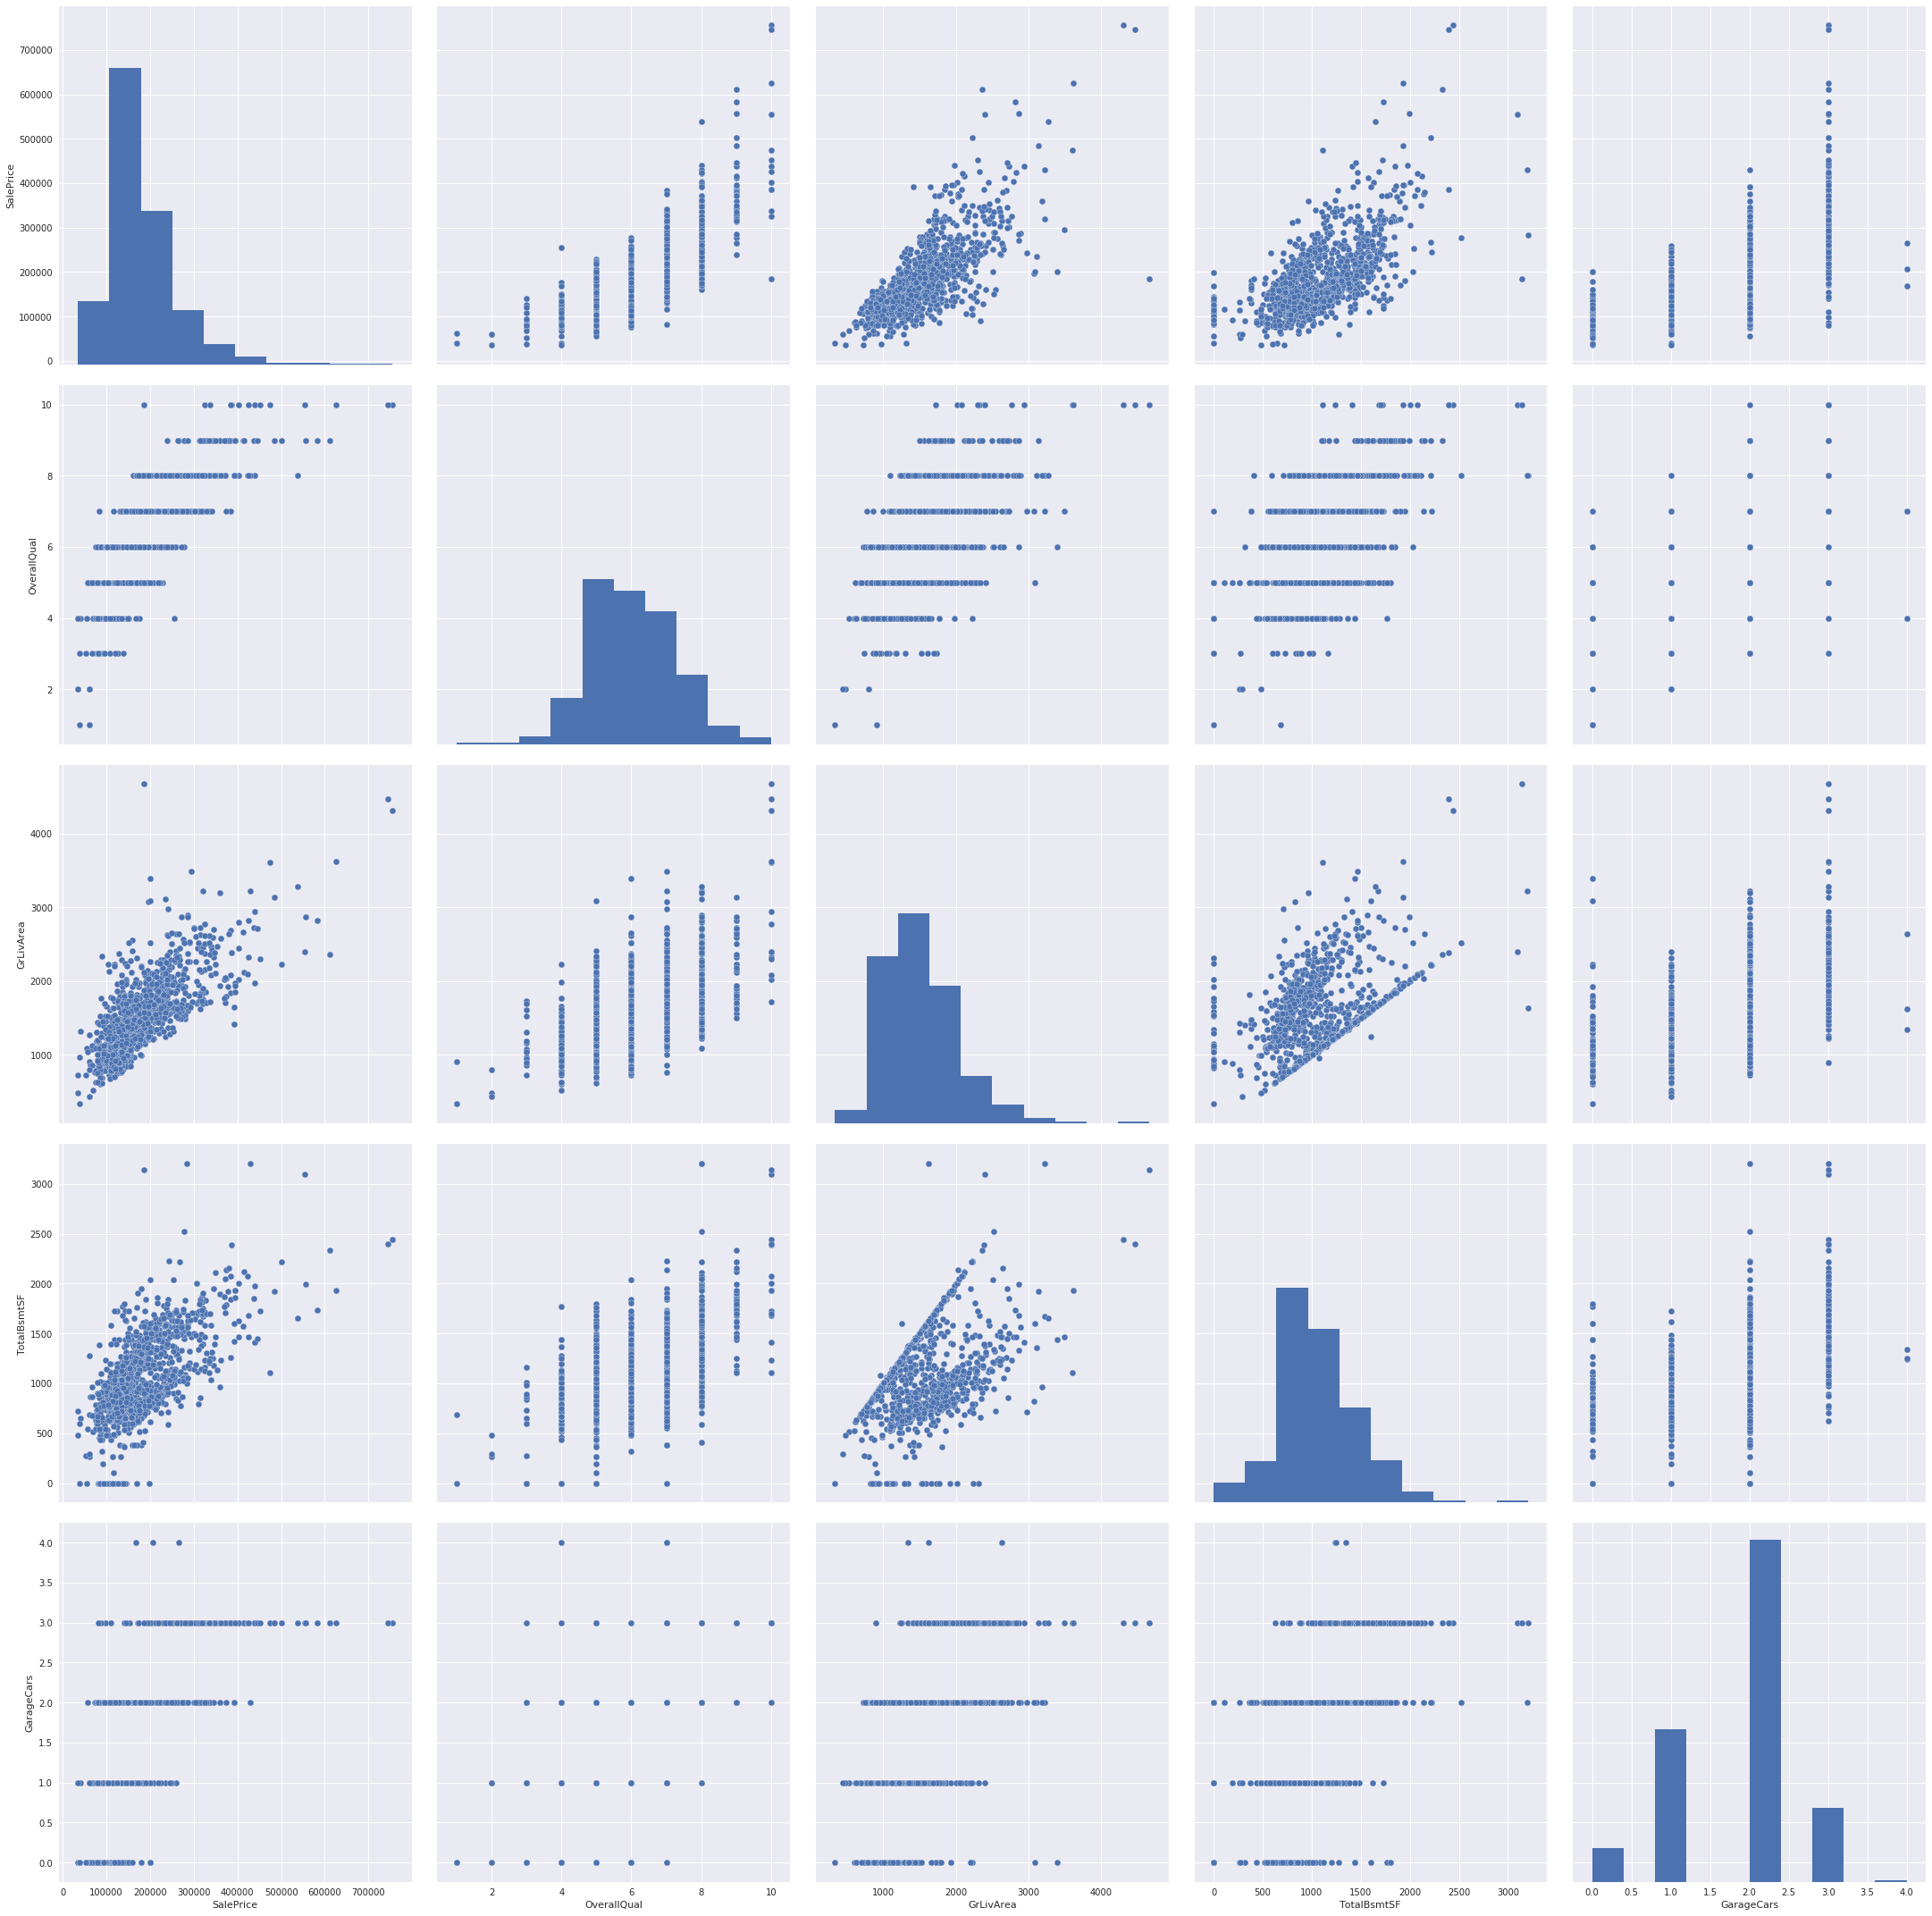

In [26]:
# visualize the relationship between the features and the response using scatterplots
sns.set()
print('Important numerical features: {}'.format(important_numerical_features))
#sns.pairplot(numerical_train_data_df[important_numerical_features], size=7, aspect=0.7, kind='reg')
sns.pairplot(numerical_train_data_df[important_numerical_features], size=6, aspect=1)
#plt.show()

### 1.2.4. Vizualisation of categorical features

In [27]:
categorical_train_data_df.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1200,1200,1200,75,1200,1200,1200,1200,1200,1200,...,1133,1133,1133,1133,1200,4,227,47,1200,1200
unique,15,5,2,2,4,4,2,5,3,25,...,6,3,5,5,3,3,4,3,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,442,946,1194,41,754,1079,1199,862,1135,179,...,718,500,1081,1093,1107,2,130,44,1036,979


In [28]:
categorical_train_data_df.shape

(1200, 44)

In [29]:
categorical_train_data_df['Street'].value_counts()

Pave    1194
Grvl       6
Name: Street, dtype: int64

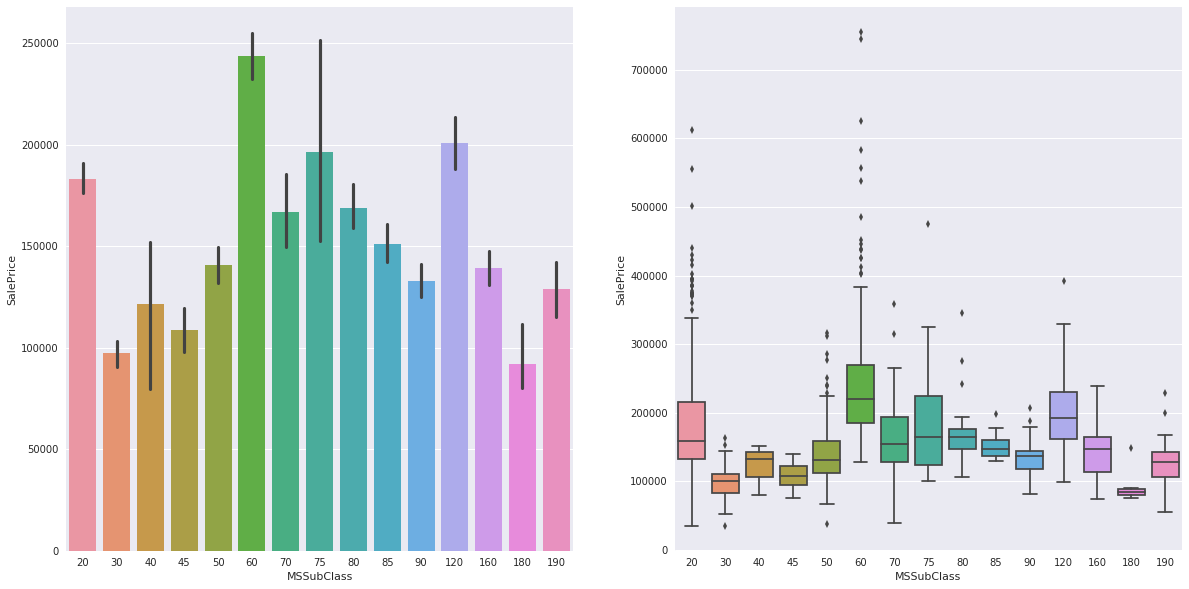

In [30]:
plt.subplots(figsize=(20,10))
ax=plt.subplot(121)
sns.barplot(x='MSSubClass', y=numerical_train_data_df['SalePrice'], data=categorical_train_data_df)
ax=plt.subplot(122)
sns.boxplot(x='MSSubClass', y=numerical_train_data_df['SalePrice'], data=categorical_train_data_df)
#.plot(kind='pie')

#categorical_train_data_df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,ax=ax)
plt.show()

In [31]:
idx_60 = categorical_train_data_df['MSSubClass'] == 60
idx_noridge = categorical_train_data_df['Neighborhood'] == 'NoRidge'

In [32]:
np.mean(train_data[idx_60 & idx_noridge]['SalePrice'])

342797.77777777775

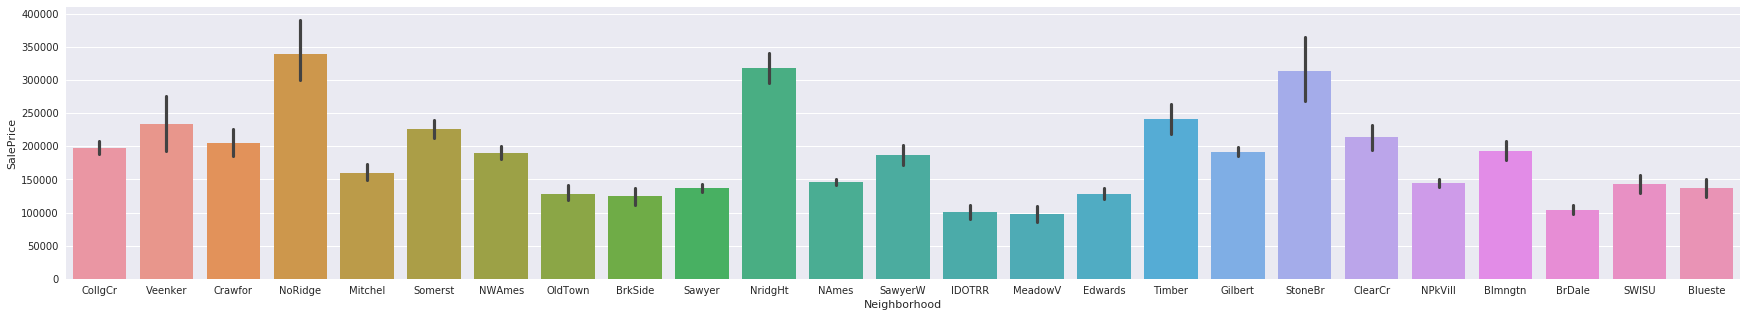

In [33]:
plt.subplots(figsize=(30,5))
sns.barplot(x='Neighborhood', y=numerical_train_data_df['SalePrice'], data=categorical_train_data_df)

# 2. Data cleaning and pre-processing

## 2.1. Pre-processing of numerical features

- missing values:
    - mean
    - autre méthode ? 
- scaling: 
    - normalisation 
    - standardisation
    - laquelle des 2 méthodes ? ==> http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html

### 2.1.1. Management of missing numerical values 

In [34]:
missing_data = numerical_train_data_df.isnull().sum().sort_values(ascending=False)
print(missing_data.head(10))

LotFrontage     210
GarageYrBlt      67
MasVnrArea        6
BsmtUnfSF         0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
1stFlrSF          0
TotalBsmtSF       0
BsmtFinSF2        0
dtype: int64


In [35]:
X = numerical_train_data_df.iloc[:, :-1]
#print(X[7:])
y = np.log(numerical_train_data_df['SalePrice'])
#print(X)

In [36]:
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)

### 2.1.2. Normalization or Standardization

In [37]:
numerical_train_data_df['YearBuilt'].describe()

count    1200.000000
mean     1971.350833
std        30.048408
min      1875.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [38]:
from sklearn.preprocessing import MinMaxScaler
year_built_remodel = numerical_train_data_df[['YearBuilt', 'YearRemodAdd']]
minmax_scale = MinMaxScaler().fit(year_built_remodel)
year_built_remodel_scale = minmax_scale.transform(year_built_remodel)
normalization = pd.DataFrame(year_built_remodel_scale, columns=['YearBuilt', 'YearRemodAdd'])
normalization.describe()

,YearBuilt,YearRemodAdd
count,1200.000000,1200.000000
mean,0.713710,0.583125
std,0.222581,0.342120
min,0.000000,0.000000
25%,0.585185,0.283333
50%,0.725926,0.733333
75%,0.925926,0.900000
max,1.000000,1.000000


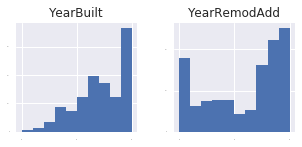

In [39]:
plt.subplots(figsize=(5,2))
ax=plt.subplot()
normalization.hist(xlabelsize=1, ylabelsize=1,ax=ax)
#numerical_train_data_df.hist(xlabelsize=1, ylabelsize=1, subplot=True)
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
year_built_remodel = numerical_train_data_df[['YearBuilt', 'YearRemodAdd']]
standard_sclarer = StandardScaler().fit(year_built_remodel)
year_built_remodel_scale2 = standard_sclarer.transform(year_built_remodel)
standard_sclarer_df = pd.DataFrame(year_built_remodel_scale2, columns=['YearBuilt', 'YearRemodAdd'])
standard_sclarer_df.describe()

,YearBuilt,YearRemodAdd
count,1.200000e+03,1.200000e+03
mean,-2.629008e-15,2.205643e-15
std,1.000417e+00,1.000417e+00
min,-3.207857e+00,-1.705155e+00
25%,-5.776701e-01,-8.766408e-01
50%,5.490654e-02,4.392342e-01
75%,9.538313e-01,9.265953e-01
max,1.286766e+00,1.219012e+00


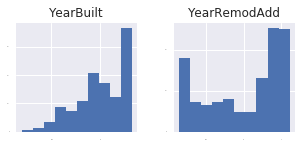

In [41]:
plt.subplots(figsize=(5,2))
ax=plt.subplot()
standard_sclarer_df.hist(xlabelsize=1, ylabelsize=1,ax=ax)
#numerical_train_data_df.hist(xlabelsize=1, ylabelsize=1, subplot=True)
plt.show()

In [42]:
year_built_remodel.columns

Index(['YearBuilt', 'YearRemodAdd'], dtype='object')

In [43]:
validation_size = 0.20
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=0)

In [44]:
X_train.shape

(960, 35)

In [45]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_validation)

#print(predictions.shape)
print('RMSE is:', mean_squared_error(y_validation, predictions))

RMSE is: 0.03054986077200488


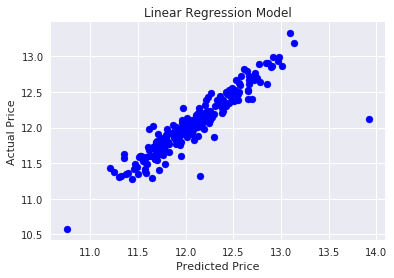

In [46]:
plt.scatter(predictions, y_validation, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

## 2.2. Pre-processing of categorical features

In [47]:
categorical_train_data_df.shape

(1200, 44)

In [48]:
missing_data = categorical_train_data_df.isnull().sum().sort_values(ascending=False)
print(missing_data.head(10))

PoolQC          1196
MiscFeature     1153
Alley           1125
Fence            973
FireplaceQu      564
GarageCond        67
GarageQual        67
GarageFinish      67
GarageType        67
BsmtExposure      33
dtype: int64


Tranformation des categorical features en numeric values

In [49]:
new_categorical_features = pd.get_dummies(categorical_train_data_df)

In [50]:
new_categorical_features.shape

(1200, 258)

In [51]:
new_categorical_features.insert(258, 'SalePrice', numerical_train_data_df['SalePrice'])

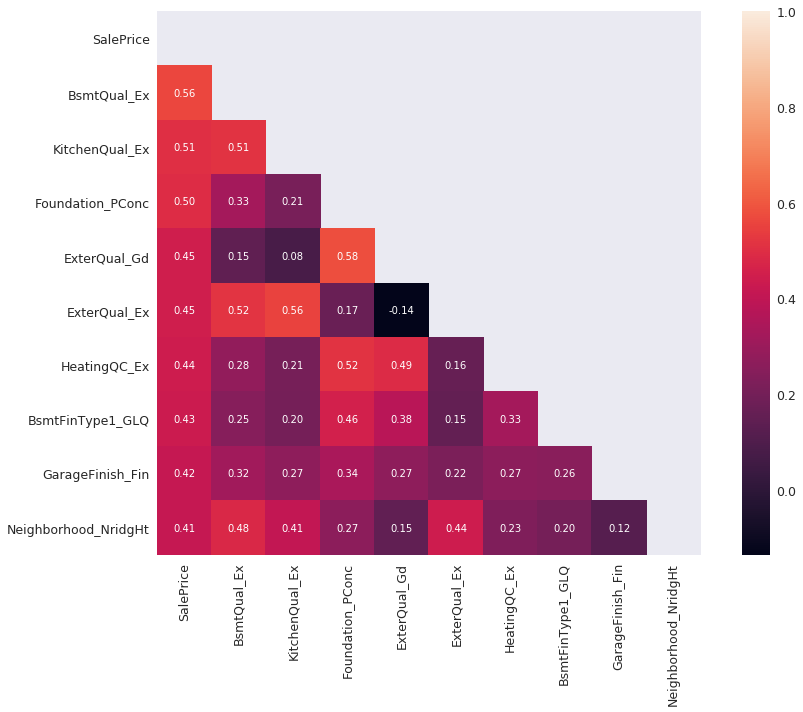

In [52]:
corr_matrix = new_categorical_features.corr()
plt.figure(figsize=(15,10))
k = 10
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(new_categorical_features[cols].values.T)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.set(font_scale=1.25)
sns.heatmap(cm, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, \
           yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [53]:
na_categorical_features = pd.get_dummies(categorical_train_data_df, dummy_na=True)

In [54]:
na_categorical_features.shape

(1200, 302)

In [55]:
categorical_train_data_df['SaleType'].dtype

dtype('O')

In [56]:
categorical_train_data_df['SaleType'].value_counts()

WD       1036
New       101
COD        37
ConLD       9
ConLI       5
ConLw       5
CWD         3
Con         2
Oth         2
Name: SaleType, dtype: int64

In [57]:
na_categorical_features.head(10)

,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


- xgboost = Xtreme Gradient Boosting
- Gradient Boosting = aggregation de plusieurs clf 
- decision tree = overfit 
    - introduire le xgboost

In [58]:
na_categorical_features.columns[0:30]

Index(['MSSubClass_20.0', 'MSSubClass_30.0', 'MSSubClass_40.0',
       'MSSubClass_45.0', 'MSSubClass_50.0', 'MSSubClass_60.0',
       'MSSubClass_70.0', 'MSSubClass_75.0', 'MSSubClass_80.0',
       'MSSubClass_85.0', 'MSSubClass_90.0', 'MSSubClass_120.0',
       'MSSubClass_160.0', 'MSSubClass_180.0', 'MSSubClass_190.0',
       'MSSubClass_nan', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'MSZoning_nan', 'Street_Grvl',
       'Street_Pave', 'Street_nan', 'Alley_Grvl', 'Alley_Pave', 'Alley_nan',
       'LotShape_IR1', 'LotShape_IR2'],
      dtype='object')

In [59]:
np.sum(na_categorical_features['SaleType_nan'])

0

In [60]:
new_categorical_features.shape

(1200, 259)

In [61]:
new_categorical_features.head(10)

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,208500
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,181500
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,223500
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,140000
5,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,250000
6,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,143000
7,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,307000
8,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,200000
9,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,129900


# 3. Defining a modeling approach to the problem

Rappel de nos 2 datasets
- numerical_train_data_df
- new_categorical_features

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def get_mean_absolute_error(X, y): 
    return -1 * cross_val_score(RandomForestRegressor(50), X, y, scoring = 'neg_mean_absolute_error').mean()

num_without_SalePrice = numerical_train_data_df.drop(columns=['SalePrice'])
sale_price = numerical_train_data_df.iloc[:,-1]
mae_without_categorical = get_mean_absolute_error(num_without_SalePrice, sale_price)
mae_OneHotEncoded = get_mean_absolute_error()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
num_without_SalePrice.shape

In [ ]:
numerical_train_data_df.shape

In [ ]:
new_categorical_features.shape

In [ ]:
new_categorical_features.iloc[:,:-1].shape

In [ ]:
new_dataset = pd.concat((numerical_train_data_df.iloc[:,:-1], new_categorical_features), axis=1)

In [ ]:
X = new_dataset.iloc[:, :-1]
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)

In [ ]:
new_dataset = X

In [ ]:
labels = np.log(numerical_train_data_df.iloc[:,1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset, labels, test_size=0.2, random_state=123)

In [ ]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

#print(predictions.shape)
print('RMSE is:', mean_squared_error(y_test, predictions))

# 5. Build such a statistical model

## 5.1. SUBMISSION PART

In [ ]:
print('Shape of train dataset: {}'.format(train_data.shape))
features_of_interests = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
training_data = train_data[features_of_interests]
labels = train_data['SalePrice']

from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(training_data, labels)

print('Shape of test dataset: {}'.format(test_data.shape))
test_data.fillna(test_data.mean(), inplace=True)
quick_test = test_data[features_of_interests]

predictions = forest_model.predict(quick_test)
print(predictions)

my_submission=pd.DataFrame({'Id':test_data.Id,'SalePrice':predictions})
#my_submission.to_csv('submission_aml17.csv',index=False)